# Цель лабораторной работы
Изучить способы предварительной обработки данных для дальнейшего формирования моделей.

# Задание
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
- обработку пропусков в данных;
- кодирование категориальных признаков;
- масштабирование данных.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [44]:
data = pd.read_csv('nyc-jobs.csv', sep=",")
data = data.drop(columns=['Job ID'])

In [45]:
data.shape

(3843, 27)

In [46]:
data.dtypes

Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Job Description                   object
Minimum Qual Requirements         object
Preferred Skills                  object
Additional Information            object
To Apply                          object
Hours/Shift                       object
Work Location 1                   object
Recruitment Contact              float64
Residency Requirement             object
Posting Date                      object
Post Until      

In [47]:
data.isnull().sum()

Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Code No                       0
Level                               0
Job Category                        2
Full-Time/Part-Time indicator     301
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                  3825
Minimum Qual Requirements        3825
Preferred Skills                 3831
Additional Information           3834
To Apply                         3827
Hours/Shift                      3840
Work Location 1                  3840
Recruitment Contact              3843
Residency Requirement            3825
Posting Date                        0
Post Until                       2490
Posting Updated                     0
Process Date

In [48]:
data.head()

,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,42405.00,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-03-19T00:00:00.000
1,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,60740.00,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-03-19T00:00:00.000
2,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-03-19T00:00:00.000
3,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-03-19T00:00:00.000
4,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-03-19T00:00:00.000


## УдОлим колонки, в которых много пропусков

In [49]:
bad_columns = []
good_columns = []
bad_coef = 0.4

for col in data.columns:
    null_count = data[col].isnull().sum()
    if null_count / data.shape[0] > bad_coef:
        bad_columns.append(col)
    else:
        good_columns.append(col)
        
print('Удалены колонки:', bad_columns)

Удалены колонки: ['Job Description', 'Minimum Qual Requirements', 'Preferred Skills', 'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1', 'Recruitment Contact', 'Residency Requirement', 'Post Until']


In [50]:
data = data[good_columns]

In [51]:
data.shape

(3843, 17)

In [52]:
data.head()

,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Posting Date,Posting Updated,Process Date
0,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-03-19T00:00:00.000
1,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-03-19T00:00:00.000
2,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-03-19T00:00:00.000
3,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-03-19T00:00:00.000
4,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,2014-01-09T00:00:00.000,2014-01-08T00:00:00.000,2019-03-19T00:00:00.000


In [53]:
data.dtypes

Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Civil Service Title               object
Title Code No                     object
Level                             object
Job Category                      object
Full-Time/Part-Time indicator     object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Division/Work Unit                object
Posting Date                      object
Posting Updated                   object
Process Date                      object
dtype: object

## Выбор бинарных и категориальных признаков

In [54]:
binary_cols = []
cat_cols = []
num_cols = []

for col in data.columns:
    value_count = data[col].dropna().nunique()
    dt = str(data[col].dtype)
    if value_count <= 2:
        binary_cols.append(col)
    elif dt == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

non_binary_cols = [*cat_cols, *num_cols]

#### Бинарные колонки:

In [55]:
binary_cols

['Posting Type', 'Full-Time/Part-Time indicator', 'Process Date']

#### Категориальные колонки:

In [56]:
cat_cols

['Agency',
 'Business Title',
 'Civil Service Title',
 'Title Code No',
 'Level',
 'Job Category',
 'Salary Frequency',
 'Work Location',
 'Division/Work Unit',
 'Posting Date',
 'Posting Updated']

#### Числовые калонки:

In [57]:
num_cols

['# Of Positions', 'Salary Range From', 'Salary Range To']

#### Все небинарные колонки

In [58]:
non_binary_cols

['Agency',
 'Business Title',
 'Civil Service Title',
 'Title Code No',
 'Level',
 'Job Category',
 'Salary Frequency',
 'Work Location',
 'Division/Work Unit',
 'Posting Date',
 'Posting Updated',
 '# Of Positions',
 'Salary Range From',
 'Salary Range To']

### Гистограмма по признакам

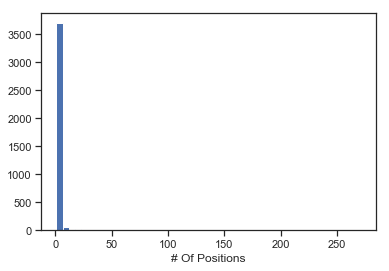

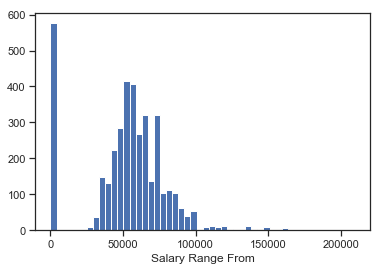

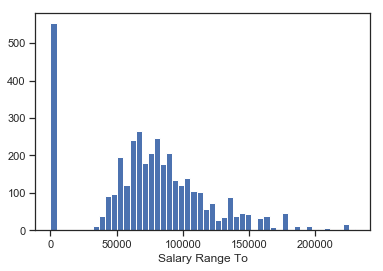

In [59]:
for col in num_cols:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

## Заполнение пустых значений

In [60]:
# Заполним отсутсвующие значения колличественных признаков
# медианными в текущем столбце
data = data.fillna(data.median(axis=0), axis=0)

# Заполнение отсутсвующих категориальных данных самыми популярными
described_data = data.describe(include=[object])
for col in [*cat_cols, *binary_cols]:
    data[col] = data[col].fillna(described_data[col]['top'])

In [61]:
data.isnull().sum()

Agency                           0
Posting Type                     0
# Of Positions                   0
Business Title                   0
Civil Service Title              0
Title Code No                    0
Level                            0
Job Category                     0
Full-Time/Part-Time indicator    0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Division/Work Unit               0
Posting Date                     0
Posting Updated                  0
Process Date                     0
dtype: int64

In [62]:
data.head()

,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Posting Date,Posting Updated,Process Date
0,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,"Engineering, Architecture, & Planning",F,42405.00,65485.00,Annual,110 William St. N Y,Strategy & Analytics,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-03-19T00:00:00.000
1,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,"Engineering, Architecture, & Planning",F,60740.00,162014.00,Annual,110 William St. N Y,Tech Talent Pipeline,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-03-19T00:00:00.000
2,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-03-19T00:00:00.000
3,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,51907.68,54580.32,Annual,Heating Mgt-Operations,Management Services Department,2013-10-24T00:00:00.000,2013-12-12T00:00:00.000,2019-03-19T00:00:00.000
4,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,35.00,35.00,Hourly,DMP-Contract & Analysis Unit,Dept of Management & Planning,2014-01-09T00:00:00.000,2014-01-08T00:00:00.000,2019-03-19T00:00:00.000


## Кодирование признаков

In [63]:
# Преобразуем данные бинарных признаков в 1 / 0
for col in binary_cols:
    top = described_data[col]['top']
    top_items = data[col] == top
    data.loc[top_items, col] = 0
    data.loc[np.logical_not(top_items), col] = 1
    
# Векторизация небинарных признаков
data_nonbinary = pd.get_dummies(data.loc[:, data.notnull().any(axis = 0)])

# Нормализация количественных признаков
data_numerical = data[num_cols]
data_numerical = \
    (data_numerical - data_numerical.mean()) / data_numerical.std()

# Слить в одну таблицу
data = pd.concat((
#     data_numerical,
    data[binary_cols],
    data_nonbinary,
), axis=1)

In [64]:
data.head()

,Posting Type,Full-Time/Part-Time indicator,Process Date,Posting Type,# Of Positions,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Process Date,Agency_ADMIN FOR CHILDREN'S SVCS,...,Posting Updated_2019-03-07T00:00:00.000,Posting Updated_2019-03-08T00:00:00.000,Posting Updated_2019-03-09T00:00:00.000,Posting Updated_2019-03-11T00:00:00.000,Posting Updated_2019-03-12T00:00:00.000,Posting Updated_2019-03-13T00:00:00.000,Posting Updated_2019-03-14T00:00:00.000,Posting Updated_2019-03-15T00:00:00.000,Posting Updated_2019-03-16T00:00:00.000,Posting Updated_2019-03-18T00:00:00.000
0,0,0,0,0,1,0,42405.00,65485.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,60740.00,162014.00,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,52,0,51907.68,54580.32,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,52,0,51907.68,54580.32,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,50,0,35.00,35.00,0,0,...,0,0,0,0,0,0,0,0,0,0


## Масштабирование данных

In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [66]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Salary Range From']])

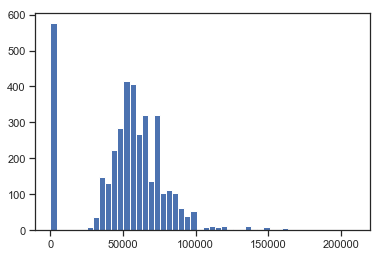

In [70]:
plt.hist(data['Salary Range From'], 50)
plt.show()

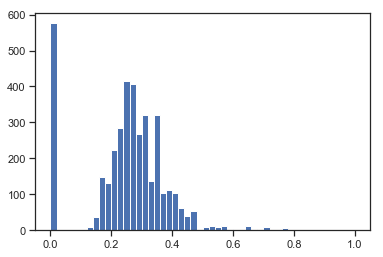

In [71]:
plt.hist(sc1_data, 50)
plt.show()